# Clase 5

Integrar como se enseña en clases de cálculo no siempre está bien. Para obtener un mejor resultadoen la integración es mejor utilizar la aproximación de segundo orden y con varias variables. Como vimos la clase pasada:


$$
\vec{y_{n+1}}=y_n+ h \vec f+\frac{1}{2}h^2\left( \frac{\partial \vec f}{\partial x} +\mathbb{J} \vec f \right)
$$

donde $f$ es $f(x_n, \vec y_n)$, $\mathbb(J)$ es el jacobiano de $f$ evaluado en $(x_n, \vec y_n)$, y el orden del error es de $O(h^2)$.

In [25]:
from pylab import *
from numpy import *
%matplotlib inline

Para resolver la ecuación  
$$
\vec y=f(x,\vec y(x))
$$

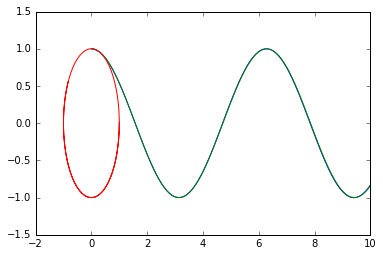

In [64]:
def integra2(ec, d_ec, p_ini, x, h=0.1):  #x en donde integras
    #f = ec(p_ini)
    #df = d_ec(p_ini)[0]
    #Jac = d_ec(p_ini)[1]
    tiempos=arange(x[0],x[1]+h,h)
    sol=zeros((len(tiempos),len(p_ini)))    #p_ini son todas las condiciones inciales
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1):    #Solución: matriz cuyo i-ésimo renglón sea la soluciónal tiempo t_i. xrange sirva para hacer ranges y que no ocupen memoria"""
        f=ec(sol[i,:],tiempos[i])
        df,jac=d_ec(sol[i,:], tiempos[i])
        sol[i+1,:]=sol[i,:]+h*f+0.5*h*h*(df+ dot (jac,f))
    return  tiempos,sol


def prueba(y,t):
    return array([y[1],-y[0]])

def d_prueba(y,t):
    return array([0,0]),array([[0,1],[-1,0]])
                 
t,y =integra2(prueba, d_prueba, [1,0], [0,10], 0.1)
                 
plot (t,y[:,0],t,cos(t))
plot(y[:,0],y[:,1])

# Oscilador Anarmónico

$$
y''+2 \gamma y'+\omega_0^2 sin y=e^{-t}
$$

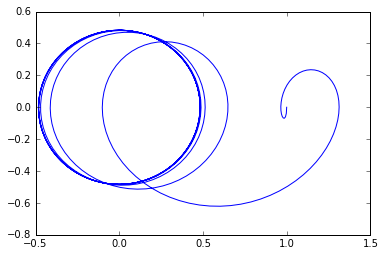

In [76]:
def p(y,t):
    return array([y[1],-2*y[1]-0.5*sin(y[0])+sin(t)])

def dp(y,t):
    return array([0,0]),array([[0,1],[-0.5*cos(y[0]),-2]])

t,y=integra2(p,dp,[1,0],[0,50])
#plot(t,y[:,0])
plot(y[:,0], y[:,1])

# Arrays

In [6]:
a=array([2,6])
b=[2,6]
print a,b
print a*2, b*2  #Diferencia entre array y listas

[2 6] [2, 6]
[ 4 12] [2, 6, 2, 6]


In [27]:
A=array([[1,0],[0,1]])
B=matrix([[1,0],[0,1]])
print  A 
print B
print  A*b
print   dot(B,b)


[[1 0]
 [0 1]]
[[1 0]
 [0 1]]
[[2 0]
 [0 6]]
[[2 6]]


In [29]:
A=array([[1,2],[3,4]])
a=array([6,7])
print A[0,0], A[0,1],A[1,0],A[1,1] #Aquí las columnas van primero
print A*a #Esto no es el producto de matrices... multiplica el primer renglón 
#por el vector

1 2 3 4
[[ 6 14]
 [18 28]]


In [30]:
print dot(A,a) #Esto sí es el producto de matrices 

[20 46]


Si se quiere hacer producto entre vector y matriz definir a los 2 como arreglos. Si se define a la matriz como matriz te queda [[2,6]]. Hacer multiplicación entre dos arrays sólo hace la mitad

# Matrices

In [12]:
x=zeros((2,6))    #genera array
print x
x[1,0]=7
x[1,5]=9
print x
print x[:,1] #imprimir renglones y columnas
print x[1,:]*1
type (x[:,1])

[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.]
 [ 7.  0.  0.  0.  0.  9.]]
[ 0.  0.]
[ 7.  0.  0.  0.  0.  9.]


numpy.ndarray